# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Ames Housing dataset.

## Objectives

You will be able to:

* Create a scatter matrix and correlation matrix
* Assess and interpret the output of a correlation matrix
* Identify if variables are exhibiting collinearity
* Decide how to address the collinearity in the data set

## Correlation matrix for the Ames Housing data

### Import data

Let's reimport the Ames Housing data assign the numeric variables we want to keep to `numeric_vars`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

ames = pd.read_csv('ames.csv')

numeric_vars = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea']

### Create processed
Create a new dataframe named `ames_preprocessed` that contains only the features in `numeric_vars`.

In [2]:
ames_preprocessed = ames[numeric_vars]

## Scatter matrix
Create the scatter matrix for the Ames Housing data. This takes a few minutes to load!

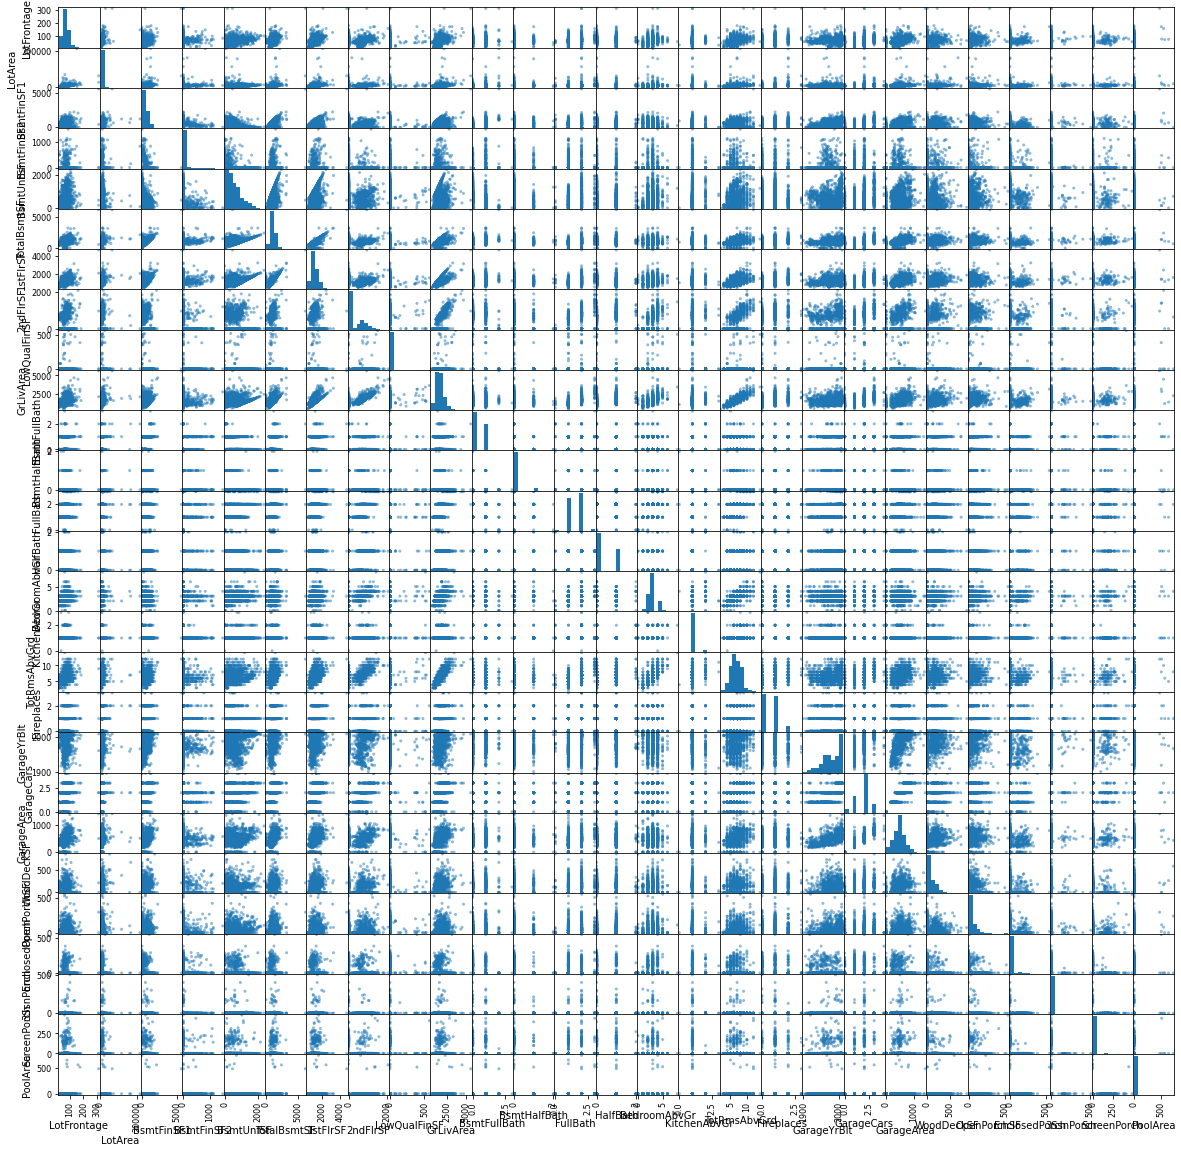

In [3]:
pd.plotting.scatter_matrix(ames_preprocessed, figsize=(20, 20));

The scatter matrix took a while to load and is hard to read. Run the code below to see if adjusting some of the visualization settings helps. 

In [4]:
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]|

plt.show()

SyntaxError: invalid syntax (<ipython-input-4-4400916044a4>, line 12)

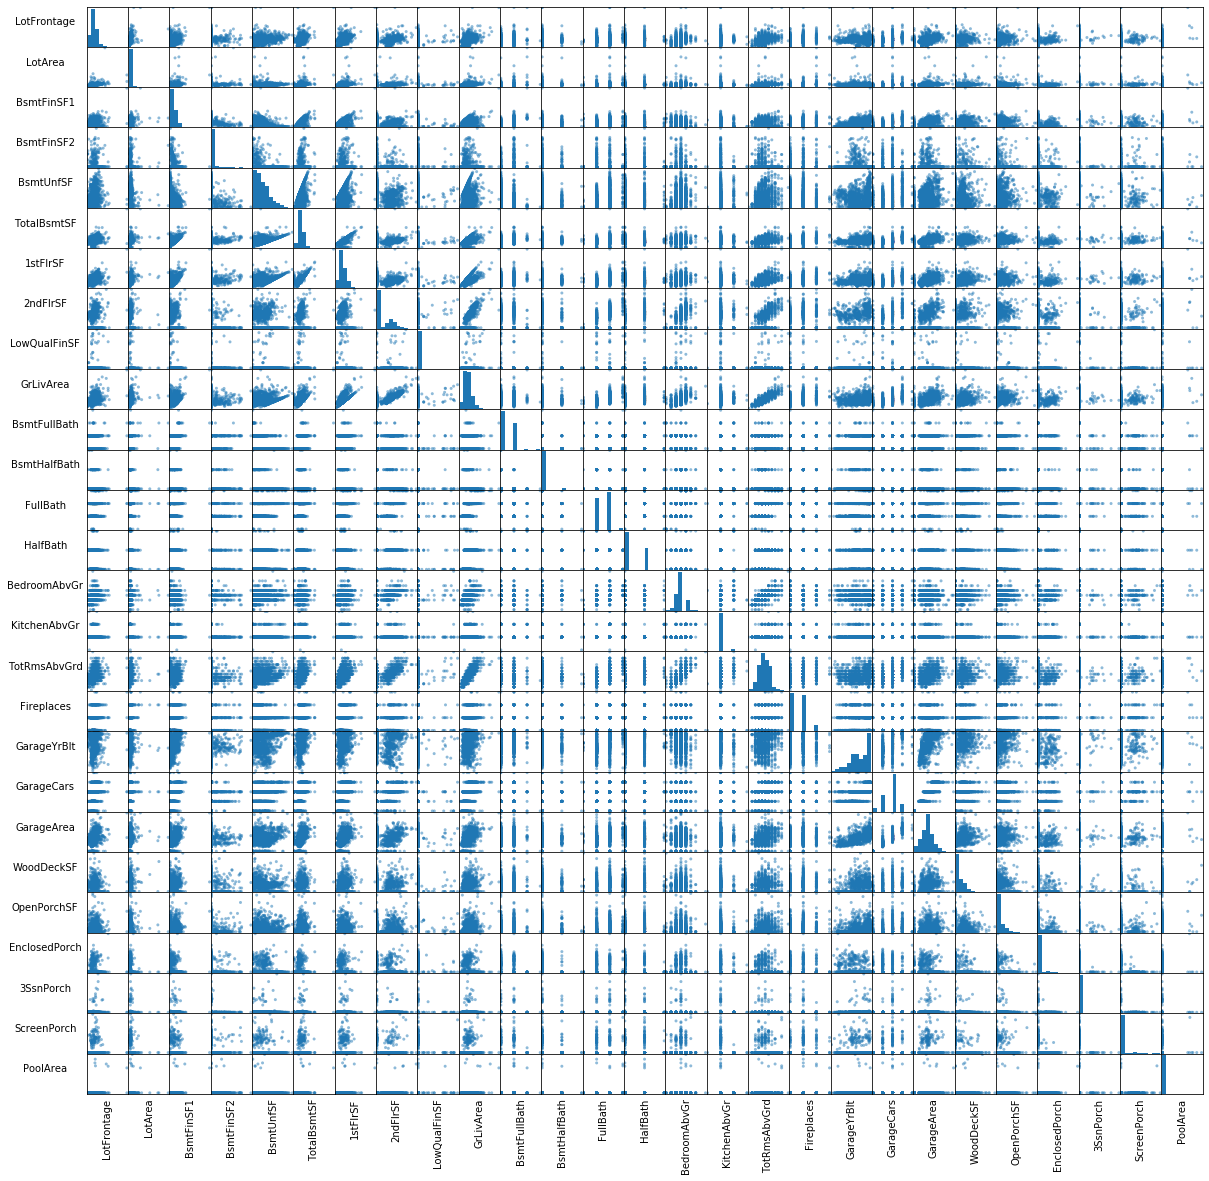

In [4]:
#__Solution__
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

The enhanced plot demonstrates that with larger datasets, scatter matricies become less useful. Through careful examination of the matrix it's clear that `TotRmsAbvGrd` seems correlated with `GrLivArea`, but how easy to use would this matrix if a dataset has hundreds or thousands of variables? Also visual approach to finding correlation cannot be automated, so a numeric approach is a good next step.

## Correlation matrix

Next, create and look at the correlation matrix: 

In [5]:
corr_matrix = ames_preprocessed.corr()
print(corr_matrix)

               LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage       1.000000  0.426095    0.233633    0.049900   0.132644   
LotArea           0.426095  1.000000    0.214103    0.111170  -0.002618   
BsmtFinSF1        0.233633  0.214103    1.000000   -0.050117  -0.495251   
BsmtFinSF2        0.049900  0.111170   -0.050117    1.000000  -0.209294   
BsmtUnfSF         0.132644 -0.002618   -0.495251   -0.209294   1.000000   
TotalBsmtSF       0.392075  0.260833    0.522396    0.104810   0.415360   
1stFlrSF          0.457181  0.299475    0.445863    0.097117   0.317987   
2ndFlrSF          0.080177  0.050986   -0.137079   -0.099260   0.004469   
LowQualFinSF      0.038469  0.004779   -0.064503    0.014807   0.028167   
GrLivArea         0.402797  0.263116    0.208171   -0.009640   0.240257   
BsmtFullBath      0.100949  0.158155    0.649212    0.158678  -0.422900   
BsmtHalfBath     -0.007234  0.048046    0.067418    0.070948  -0.095804   
FullBath          0.19876

Return `True` for positive or negative correlations that are bigger than 0.75 in the correlation matrix: 

In [6]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find the elements with positive correlation greater than 0.75
high_corr = upper_tri[(abs(upper_tri) > 0.75)]


print(high_corr)

               LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage            NaN      NaN         NaN         NaN        NaN   
LotArea                NaN      NaN         NaN         NaN        NaN   
BsmtFinSF1             NaN      NaN         NaN         NaN        NaN   
BsmtFinSF2             NaN      NaN         NaN         NaN        NaN   
BsmtUnfSF              NaN      NaN         NaN         NaN        NaN   
TotalBsmtSF            NaN      NaN         NaN         NaN        NaN   
1stFlrSF               NaN      NaN         NaN         NaN        NaN   
2ndFlrSF               NaN      NaN         NaN         NaN        NaN   
LowQualFinSF           NaN      NaN         NaN         NaN        NaN   
GrLivArea              NaN      NaN         NaN         NaN        NaN   
BsmtFullBath           NaN      NaN         NaN         NaN        NaN   
BsmtHalfBath           NaN      NaN         NaN         NaN        NaN   
FullBath               NaN      NaN   

<ipython-input-6-a77c4a854773>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Now, include `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [7]:
# stack correlation matrix values and filter for NaN
corr_stacked = upper_tri.stack()
corr_stacked = corr_stacked[corr_stacked.notnull()]

# filter out correlations greater than 0.75 and less than 1
high_corr_pairs = corr_stacked[(corr_stacked > 0.75) & (corr_stacked < 1)]

# zip the index values and correlation values
high_corr_pairs = list(zip(high_corr_pairs.index, high_corr_pairs))

for pair, corr in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {corr:.2f}")

TotalBsmtSF and 1stFlrSF: 0.82
GrLivArea and TotRmsAbvGrd: 0.83
GarageCars and GarageArea: 0.88


Which varibles are highly correlated in the Ames Housing data set?

In [8]:
# TotalBsmtSF and 1stFlrSF: 0.82
# GrLivArea and TotRmsAbvGrd: 0.83
# GarageCars and GarageArea: 0.88

## Make a data decision

Now that you know which variables are correlated with eachother, which would you drop from the dataset?

In [9]:
# Drop TotalBsmtSF - Every house would have a '1st floor' already. Could make a bool to store that the house has a basement instead.
# Drop TotRmsAbvGrd - knowing how much livable area a home has is much more valuable than knowing how many rooms there are.
# Personally, I would keep both variables. One represents the storage space, and one represents how many cars can physically drive in (through a door) - these are both good information to keep!

In [ ]:
#__SOLUTIOM__
"""
Since three different pairs of variables are highly correlated, the correct approach would be to drop one variable from each pair.

One approach would be to drop Garage Area, Total Rooms, and Total Basement Square Feet.

Garage Area: The size of the garage is dependent on how many cars are in it. If you wanted to still keep the information captured by Garage Area, you could create a new variable "Average space per car" before dropping Garage Area.
Total Rooms: There are other variables that count the number of kitchens, bathrooms, bedrooms, etc. 
Total Basement Square Feet: The first floor of a building is usually built upon the foundation, which contains the basement. To keep the information that there *is* a basement, you could create a variable "HasBasement", when TotalBsmtSF >0, before deleting the original variable. 
"""


## Address the colinearity

Remove the chosen variables from `ames_preprocessed`.

In [12]:
# create new bool value for HasBasement
ames_preprocessed['HasBasement'] = (ames['TotalBsmtSF'] > 0)

# drop the old columns
ames_preprocessed = ames_preprocessed.drop('TotalBsmtSF', axis=1)
ames_preprocessed = ames_preprocessed.drop('TotRmsAbvGrd', axis=1)
ames_preprocessed

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,HasBasement
0,65.0,8450,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2003.0,2,548,0,61,0,0,0,0,True
1,80.0,9600,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,1976.0,2,460,298,0,0,0,0,0,True
2,68.0,11250,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2001.0,2,608,0,42,0,0,0,0,True
3,60.0,9550,216,0,540,961,756,0,1717,1,0,1,0,3,1,1,1998.0,3,642,0,35,272,0,0,0,True
4,84.0,14260,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,2000.0,3,836,192,84,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,1999.0,2,460,0,40,0,0,0,0,True
1456,85.0,13175,790,163,589,2073,0,0,2073,1,0,2,0,3,1,2,1978.0,2,500,349,0,0,0,0,0,True
1457,66.0,9042,275,0,877,1188,1152,0,2340,0,0,2,0,4,1,2,1941.0,1,252,0,60,0,0,0,0,True
1458,68.0,9717,49,1029,0,1078,0,0,1078,1,0,1,0,2,1,0,1950.0,1,240,366,0,112,0,0,0,True


## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Ames Housing data set. You also edited the Ames Housing data set so highly correlated variables are removed.